In [370]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.integrate as integrate
from iminuit import Minuit

In [371]:
#Daten einlesen
with open('eich_ba_120s.txt') as data:
    adcvalue_baeich = np.loadtxt(data, usecols= 0)
with open('eich_ba_120s.txt') as data:
    counts_baeich = np.loadtxt(data, usecols= 1)

with open('eich_co_120s.txt') as data:
    adcvalue_coeich = np.loadtxt(data, usecols= 0)
with open('eich_co_120s.txt') as data:
    counts_coeich = np.loadtxt(data, usecols= 1)

with open('eich_cs_120s.txt') as data:
    adcvalue_cseich = np.loadtxt(data, usecols= 0)
with open('eich_cs_120s.txt') as data:
    counts_cseich = np.loadtxt(data, usecols= 1)

with open('eich_na_120s.txt') as data:
    adcvalue_naeich = np.loadtxt(data, usecols= 0)
with open('eich_na_120s.txt') as data:
    counts_naeich = np.loadtxt(data, usecols= 1)

energy_calibration_y = []
energy_calibration_y_error = []
energy_calibration_y_sigma = []
energy_calibration_x = []



In [372]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

#Methoden Gaußfits für Mittelwerte
def gauss(x, H, A, x0, sigma):
    return A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_gauss(x, a,b, A, x0, sigma):
    return line(x,a,b) + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

def lin_double_gauss(x, a,b, A1, x01, sigma1,A2, x02, sigma2):
    return line(x,a,b) + A1 * np.exp(-(x - x01) ** 2 / (2 * sigma1 ** 2)) + A2 * np.exp(-(x - x02) ** 2 / (2 * sigma2 ** 2))

#TODO: Doppelgaußfit und Linearer Untergrund 
#TODO: integral nicht 3 sigma sondern über \sqrt(2pi) sigma A
#Gaußfits
def lin_fit(x,y,startparameter):
    popt, pcov = curve_fit(line, x, y, p0=startparameter, absolute_sigma=True)
    return popt,pcov

def gauss_fit(x, y):
    mean = sum(x * y) / sum(y)
    sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(gauss, x, y, p0=[min(y), max(y), mean, sigma], absolute_sigma=True)
    return popt[0], popt[1] , popt[2], popt[3], np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3])

def lin_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(pcov)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4])

def lin_double_gauss_fit(x, y, startparameter):
    #mean = sum(x * y) / sum(y)
    #sigma = np.sqrt(sum(y * (x - mean) ** 2) / sum(y))
    popt, pcov = curve_fit(lin_double_gauss, x, y, p0=startparameter, absolute_sigma=True)
    #print(0,-1, max(y), mean, sigma)
    #return popt, np.sqrt(np.diag(pcov))
    return popt[0], popt[1] , popt[2], popt[3],popt[4], popt[5], popt[6],popt[7],np.sqrt(pcov[0,0]) , np.sqrt(pcov[1,1]),np.sqrt(pcov[2,2]), np.sqrt(pcov[3,3]), np.sqrt(pcov[4,4]), np.sqrt(pcov[5,5]), np.sqrt(pcov[6,6]), np.sqrt(pcov[7,7])

#a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler

# least-squares score function = sum of data residuals squared
def LSQ(a, b,x,y,sigma_y):
    return np.sum((y - line(x, a, b)) ** 2 / sigma_y ** 2)

Amplitude A Na 511: 148.18940909191923
Amplitude A Fehler Na 511: 0.28650122875480305
Erwartungswert mu Na 511: 72.062129772496
Erwartungswert mu Fehler Na 511: 0.006247
Standardabweichung sigma Na 511: 2.850648110824907
Standardabweichung sigma Fehler Na 511: 0.006947
Kalibrierungsfaktor Na 511: 9.186517274606919
Feher Kalibrierungsfaktor Na 511: 0.039558
Anzahl gemessener Events in 3 sigma Intervall:  (2112.061764819261, 2.3448595929537186e-11)
Anzahl gemessener Events aus Analytischem Integral:  2117.7793371365196
Anzahl gemessener Events aus Analytischem Integral Fehler:  6.587701994384189
Amplitude A Na 1275: 45.987693072997196
Amplitude A Fehler Na 1275: 0.4547238320040443
Erwartungswert mu Na 1275: 177.46337600968087
Erwartungswert mu Fehler Na 1275: 0.049847
Standardabweichung sigma Na 1275: 4.559251304571964
Standardabweichung sigma Fehler Na 1275: 0.055217
Kalibrierungsfaktor Na 1275: 7.184581002958306
Feher Kalibrierungsfaktor Na 1275: 0.000311
Anzahl gemessener Events in 3 

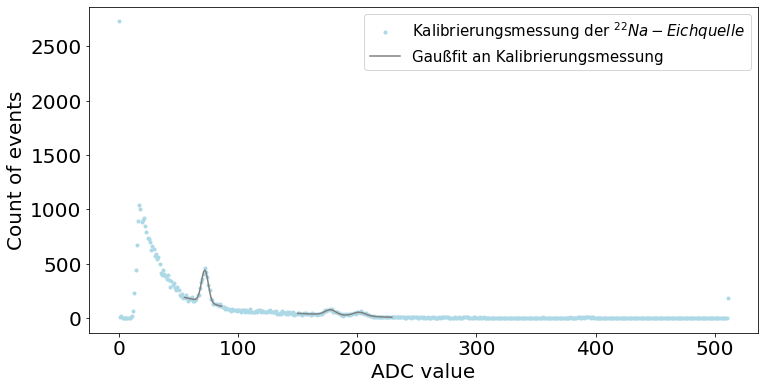

In [373]:
#na-Eichung
adc = adcvalue_naeich
count = counts_naeich

gaussstart = 55
gaussstop = 87
gaussstart2 = 150
gaussstop2 = 230

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{22}Na-Eichquelle$")

#Gauß 511
startparameter = 500, -10, 500, 80, 10
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
#print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigma/x0
print("Amplitude A Na 511:",A/2)
print("Amplitude A Fehler Na 511:",Afehler/2)
print("Erwartungswert mu Na 511:",x0)
print("Erwartungswert mu Fehler Na 511:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Na 511:",sigma)
print("Standardabweichung sigma Fehler Na 511:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Na 511:",calibrationfactor)
print("Feher Kalibrierungsfaktor Na 511:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)


#Gauß 1275
startparameter = 109.88100228997257, -0.45135715222124273, 45.987693527106956, 177.46337283813276, 4.559257579449881, 33.266083402874315, 201.8055626501613, 5.1631171173323045
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart2:gaussstop2] , count[gaussstart2:gaussstop2],startparameter)
FWHM1275 = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart2:gaussstop2], lin_double_gauss(adc[gaussstart2:gaussstop2], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Kalibrierungsmessung")

na_photopeak1 = 1275
calibrationfactor1 = na_photopeak1 / x01
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Na 1275:",A1)
print("Amplitude A Fehler Na 1275:",Afehler1)
print("Erwartungswert mu Na 1275:",x01)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Na 1275:",sigma1)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor1)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler1))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(na_photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

na_photopeak2 = 1275
calibrationfactor2 = na_photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Na 1275:",A2)
print("Amplitude A Fehler Na 1275:",Afehler2)
print("Erwartungswert mu Na 1275:",x02)
print("Erwartungswert mu Fehler Na 1275:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Na 1275:",sigma2)
print("Standardabweichung sigma Fehler Na 1275:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Na 1275:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Na 1275:",'{:f}'.format(calibrationfactorfehler2))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(na_photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)+A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2+(sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Comptonkante: 34.5


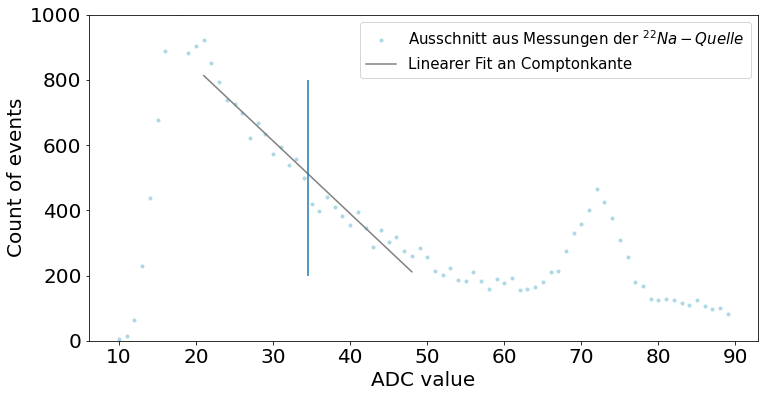

In [374]:
#Comptonkante Fit Na
comptonstart = 21
comptonstop = 48
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)


#Plotten der unskalierten Kurven
ax.plot(adc[10:90], count[10:90],'o',markersize=3, color = "lightblue",label = "Ausschnitt aus Messungen der $^{22}Na-Quelle$")
plt.ylim(0,1000)


#Fit an Gerade
startparameter = 5000, -200
popt,pcov = lin_fit(adc[comptonstart:comptonstop+1],count[comptonstart:comptonstop+1],startparameter)
ax.plot(adc[comptonstart:comptonstop+1], line(adc[comptonstart:comptonstop+1], popt[0],popt[1]), color = "grey", label="Linearer Fit an Comptonkante")
comptonkante_adc= (adc[comptonstop]+adc[comptonstart])/2
ax.vlines(comptonkante_adc,200,800)
print("Comptonkante:", comptonkante_adc)
#ax.vlines(comptonstart,0,5000)
#ax.vlines(comptonstop,0,5000)

ax.legend(fontsize=15)

Amplitude A Co 1173: 1217.2905402770207
Amplitude A Fehler Co 1173: 0.463134
Erwartungswert mu Co 1173: 165.34189522243204
Erwartungswert mu Fehler Co 1173: 0.001883
Standardabweichung sigma Co 1173: 4.51150377734706
Standardabweichung sigma Fehler Co 1173: 0.002103
Kalibrierungsfaktor Co 1173: 9.186517274606919
Feher Kalibrierungsfaktor Co 1173: 0.039558
Anzahl gemessener Events aus Analytischem Integral:  13765.92840714333
Anzahl gemessener Events aus Analytischem Integral Fehler:  8.283384890337851
Amplitude A Co 1333: 1037.2302621222318
Amplitude A Fehler Co 1333: 0.462226
Erwartungswert mu Co 1333: 187.4199353714796
Erwartungswert mu Fehler Co 1333: 0.002264
Standardabweichung sigma Co 1333: 4.691482666695951
Standardabweichung sigma Fehler Co 1333: 0.002629
Kalibrierungsfaktor Co 1333: 7.112370396232928
Feher Kalibrierungsfaktor Co 1333: 0.000014
Anzahl gemessener Events in 3 sigma Intervall:  (12164.692557962117, 1.3505521700984957e-10)
Anzahl gemessener Events aus Analytischem 

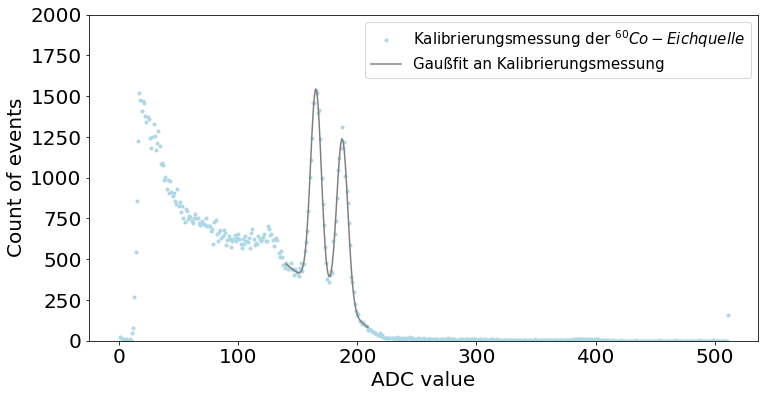

In [375]:
#co-Eichung
adc = adcvalue_coeich
count = counts_coeich

gaussstart = 140
gaussstop = 210

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{60}Co-Eichquelle$")


#Gauß 1.173
startparameter = 2000,-10, 2000, 170, 10,2000, 190, 10
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
FWHM511 = round(2.35482 * sigma,4)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)
ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Kalibrierungsmessung")

#Co-1173
photopeak1 = 1173
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Co 1173:",A1)
print("Amplitude A Fehler Co 1173:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Co 1173:",x01)
print("Erwartungswert mu Fehler Co 1173:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Co 1173:",sigma1)
print("Standardabweichung sigma Fehler Co 1173:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Co 1173:",calibrationfactor)
print("Feher Kalibrierungsfaktor Co 1173:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

#Co-1333
photopeak2 = 1333
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Co 1333:",A2)
print("Amplitude A Fehler Co 1333:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Co 1333:",x02)
print("Erwartungswert mu Fehler Co 1333:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Co 1333:",sigma2)
print("Standardabweichung sigma Fehler Co 1333:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Co 1333:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Co 1333:",'{:f}'.format(calibrationfactorfehler2))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, sigma2),x02-3*sigma2,x02+3*sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A2*sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

plt.ylim(0,2000)
ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Comptonkante: 137.5


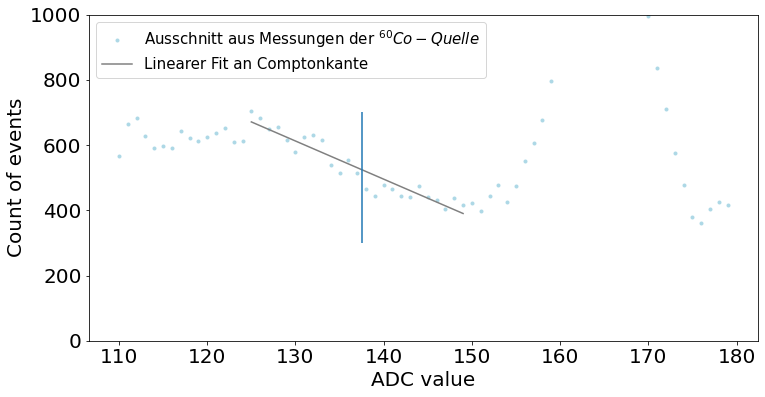

In [376]:
#Comptonkante Fit Co
comptonstart = 125
comptonstop = 150
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)


#Plotten der unskalierten Kurven
ax.plot(adc[110:180], count[110:180],'o',markersize=3, color = "lightblue",label = "Ausschnitt aus Messungen der $^{60}Co-Quelle$")
plt.ylim(0,1000)


#Fit an Gerade
startparameter = 5000, -200
popt,pcov = lin_fit(adc[comptonstart:comptonstop+1],count[comptonstart:comptonstop+1],startparameter)
ax.plot(adc[comptonstart:comptonstop], line(adc[comptonstart:comptonstop], popt[0],popt[1]), color = "grey", label="Linearer Fit an Comptonkante")
comptonkante_adc= (adc[comptonstop]+adc[comptonstart])/2
ax.vlines(comptonkante_adc,300,700)
#ax.vlines(comptonstart,0,5000)
#ax.vlines(comptonstop,0,5000)
print("Comptonkante:", comptonkante_adc)


ax.legend(fontsize=15)

Amplitude A Ba 356: 5352.665266467279
Amplitude A Fehler Ba 356: 0.610347
Erwartungswert mu Ba 356: 42.13438245043972
Erwartungswert mu Fehler Ba 356: 0.000424
Standardabweichung sigma Ba 356: 2.7165344587643476
Standardabweichung sigma Fehler Ba 356: 0.000481
Kalibrierungsfaktor Ba 356: 8.449156705185903
Feher Kalibrierungsfaktor Ba 356: 0.000011
Anzahl gemessener Events in 3 sigma Intervall:  (36349.7263422301, 4.035630302157145e-10)
Amplitude A Ba 356: 14206.738768859233
Amplitude A Fehler Ba 356: 0.603852
Erwartungswert mu Ba 356: 51.04251008942172
Erwartungswert mu Fehler Ba 356: 0.000158
Standardabweichung sigma Ba 356: 2.6586834185444923
Standardabweichung sigma Fehler Ba 356: 0.000170
Kalibrierungsfaktor Ba 356: 6.974578628212468
Feher Kalibrierungsfaktor Ba 356: 0.000003
Anzahl gemessener Events in 3 sigma Intervall:  (0.0, 0.0)
Anzahl gemessener Events aus Analytischem Integral:  131126.53887251602
Anzahl gemessener Events aus Analytischem Integral Fehler:  10.570713060274622

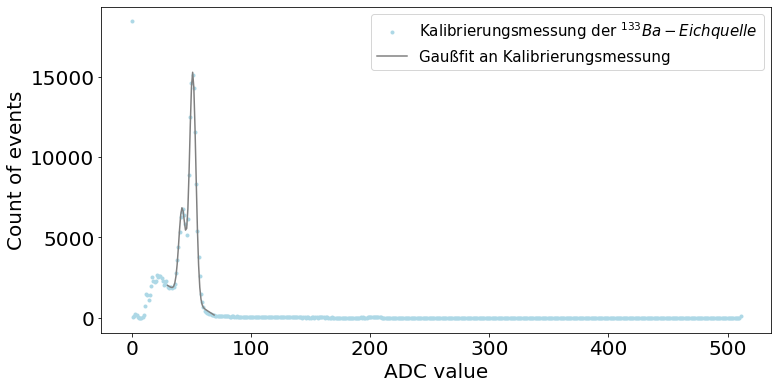

In [377]:
#Ba-Eichung
adc = adcvalue_baeich
count = counts_baeich

gaussstart = 30
gaussstop = 70


parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{133}Ba-Eichquelle$")

#Gauß 356
startparameter = 5000,-10, 15000, 30, 20,15000, 32, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A1, x01, sigma1, A2, x02, sigma2,afehler, bfehler, Afehler1, x0fehler1, sigmafehler1, Afehler2, x0fehler2, sigmafehler2 = lin_double_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_double_gauss(adc[gaussstart:gaussstop], a, b,A1, x01, sigma1, A2, x02, sigma2), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak1 = 356
calibrationfactor1 = photopeak1 / x01 
calibrationfactorfehler1 = sigmafehler1/x01
print("Amplitude A Ba 356:",A1)
print("Amplitude A Fehler Ba 356:",'{:f}'.format(Afehler1))
print("Erwartungswert mu Ba 356:",x01)
print("Erwartungswert mu Fehler Ba 356:",'{:f}'.format(x0fehler1))
print("Standardabweichung sigma Ba 356:",sigma1)
print("Standardabweichung sigma Fehler Ba 356:",'{:f}'.format(sigmafehler1))
print("Kalibrierungsfaktor Ba 356:",calibrationfactor1)
print("Feher Kalibrierungsfaktor Ba 356:",'{:f}'.format(calibrationfactorfehler1))
energy_calibration_y.append(x01)
energy_calibration_y_error.append(x0fehler1)
energy_calibration_y_sigma.append(sigma1)
energy_calibration_x.append(photopeak1)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A1, x01, sigma1),x01-3*sigma1,x01+3*sigma1)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)

photopeak2 = 356
calibrationfactor2 = photopeak2 / x02
calibrationfactorfehler2 = sigmafehler2/x02
print("Amplitude A Ba 356:",A2)
print("Amplitude A Fehler Ba 356:",'{:f}'.format(Afehler2))
print("Erwartungswert mu Ba 356:",x02)
print("Erwartungswert mu Fehler Ba 356:",'{:f}'.format(x0fehler2))
print("Standardabweichung sigma Ba 356:",-sigma2)
print("Standardabweichung sigma Fehler Ba 356:",'{:f}'.format(sigmafehler2))
print("Kalibrierungsfaktor Ba 356:",calibrationfactor2)
print("Feher Kalibrierungsfaktor Ba 356:",'{:f}'.format(calibrationfactorfehler2))
energy_calibration_y.append(x02)
energy_calibration_y_error.append(x0fehler2)
energy_calibration_y_sigma.append(-sigma2)
energy_calibration_x.append(photopeak2)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A2, x02, -sigma2),x02-3*sigma2,x02+3*-sigma2)
print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
analiticIntegral = A1*sigma1*np.sqrt(2*np.pi)+A2*-sigma2*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma1*Afehler1)**2+(A1*sigmafehler1)**2+(-sigma2*Afehler2)**2+(A2*sigmafehler2)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

3975.861198956721 -30.057679803137713 25167.375109483244 94.11122524771918 3.504432444010568
Y-Abschnitt Cs 662 3975.861198956721
Steigung Cs 662 -30.057679803137713
Amplitude A Cs 662: 25167.375109483244
Amplitude A Fehler Cs 662: 0.505278
Erwartungswert mu Cs 662: 94.11122524771918
Erwartungswert mu Fehler Cs 662: 0.000080
Standardabweichung sigma Cs 662: 3.504432444010568
Standardabweichung sigma Fehler Cs 662: 0.000086
Kalibrierungsfaktor Cs 662: 7.034229957770568
Feher Kalibrierungsfaktor Cs 662: 0.000001
Anzahl gemessener Events aus Analytischem Integral:  221078.01102332183
Anzahl gemessener Events aus Analytischem Integral Fehler:  6.986458184249572
Anzahl gemessener Events in 3 sigma Intervall:  (220481.1454794877, 2.447832436747177e-09)
Comptonadc und -energie:  67.0 471.29340717062803


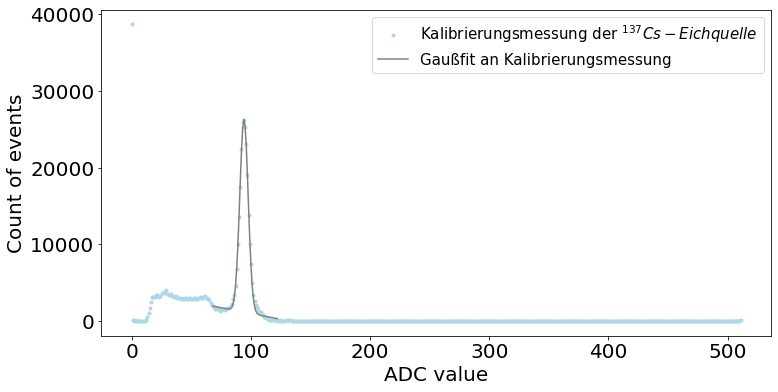

In [378]:
#cs-Eichung
adc = adcvalue_cseich
count = counts_cseich

gaussstart = 68
gaussstop = 123

parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)
#Plotten der unskalierten Kurven
ax.plot(adc, count,'o',markersize=3, color = "lightblue",label = "Kalibrierungsmessung der $^{137}Cs-Eichquelle$")

#Gauß 662
#H, A, x, sigma, Afehler, fehlermü, fehlersd = gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop])

startparameter = 3975.861774538342, -30.057679830375875, 25167.3770714547, 94.11122511762528, -3.504431671533512
#startparameter = 5000,-1, 15000, 100, 20
#ax.plot(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop], color = "grey", label="Gaußfit an Kalibrierungsmessung")
a, b, A, x0, sigma, afehler, bfehler, Afehler, x0fehler, sigmafehler = lin_gauss_fit(adc[gaussstart:gaussstop] , count[gaussstart:gaussstop],startparameter)
sigma = -sigma
print(a, b, A, x0, sigma)
#print('MW:',round(x,3), 'pm', np.sqrt(fehlermü), 'SD:', round(sigma,3), 'pm', np.sqrt(fehlersd))
FWHM511 = round(2.35482 * sigma,4)
#print('FWHM:',FWHM11)
#ax.vlines(gaussstart,0,5000)
#ax.vlines(gaussstop,0,5000)

ax.plot(adc[gaussstart:gaussstop], lin_gauss(adc[gaussstart:gaussstop], a, b,A,x0,sigma), color = "grey", label="Gaußfit an Kalibrierungsmessung")
photopeak = 662
calibrationfactor = photopeak / x0 
calibrationfactorfehler = sigmafehler/x0
print("Y-Abschnitt Cs 662", a)
print("Steigung Cs 662", b)
print("Amplitude A Cs 662:",A)
print("Amplitude A Fehler Cs 662:",'{:f}'.format(Afehler))
print("Erwartungswert mu Cs 662:",x0)
print("Erwartungswert mu Fehler Cs 662:",'{:f}'.format(x0fehler))
print("Standardabweichung sigma Cs 662:",sigma)
print("Standardabweichung sigma Fehler Cs 662:",'{:f}'.format(sigmafehler))
print("Kalibrierungsfaktor Cs 662:",calibrationfactor)
print("Feher Kalibrierungsfaktor Cs 662:",'{:f}'.format(calibrationfactorfehler))
energy_calibration_y.append(x0)
energy_calibration_y_error.append(x0fehler)
energy_calibration_y_sigma.append(sigma)
energy_calibration_x.append(photopeak)
#Intensity using integral
sigmax3integration = integrate.quad(lambda integrator: gauss(integrator,0, A, x0, sigma),x0-3*sigma,x0+3*sigma)
analiticIntegral = A*sigma*np.sqrt(2*np.pi)
analiticalIntergralFehler = np.sqrt(2*np.pi)*np.sqrt((sigma*Afehler)**2+(A*sigmafehler)**2)
print("Anzahl gemessener Events aus Analytischem Integral: ", analiticIntegral)
print("Anzahl gemessener Events aus Analytischem Integral Fehler: ", analiticalIntergralFehler)

print("Anzahl gemessener Events in 3 sigma Intervall: ", sigmax3integration)
print("Comptonadc und -energie: ", adc[67], calibrationfactor*adc[67])

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)

Comptonkante: 66.0


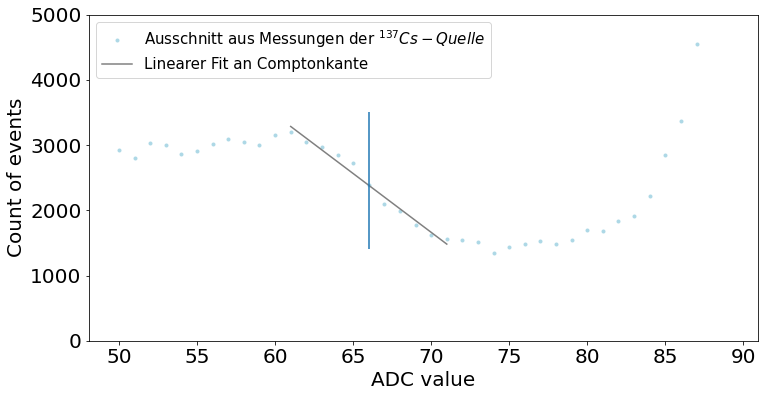

In [379]:
#Comptonkante Fit
comptonstart = 61
comptonstop = 71
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Count of events', fontsize=20)


#Plotten der unskalierten Kurven
ax.plot(adc[50:90], count[50:90],'o',markersize=3, color = "lightblue",label = "Ausschnitt aus Messungen der $^{137}Cs-Quelle$")
plt.ylim(0,5000)


#Fit an Gerade
startparameter = 5000, -200
popt,pcov = lin_fit(adc[comptonstart:comptonstop+1],count[comptonstart:comptonstop+1],startparameter)
ax.plot(adc[comptonstart:comptonstop+1], line(adc[comptonstart:comptonstop+1], popt[0],popt[1]), color = "grey", label="Linearer Fit an Comptonkante")
comptonkante_adc= (adc[comptonstop]+adc[comptonstart])/2
ax.vlines(comptonkante_adc,1400,3500)
#ax.vlines(comptonstart,0,5000)
#ax.vlines(comptonstop,0,5000)
print("Comptonkante:", comptonkante_adc)


ax.legend(fontsize=15)

Steigung: 6.334112304255195
Steigung Fehler: 0.42604124784729497
Y-Abschnitt: 101.56017467395903
Y-Abschnitt Fehler: 58.94042842583602


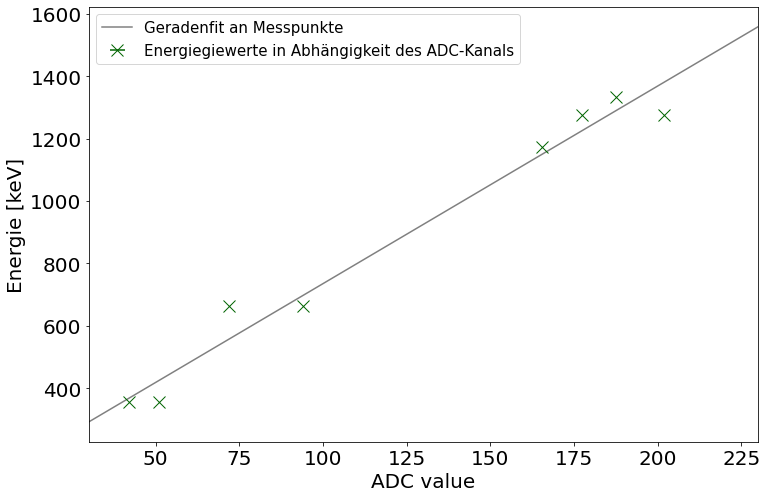

In [380]:
#Energiekalibration
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Energyspectrum open LG
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(30, 230)

#Name for axis
ax.set_xlabel('ADC value', fontsize=20)
ax.set_ylabel('Energie [keV]', fontsize=20)

#Plotten der unskalierten Kurven
# linear_model=np.polyfit(energy_calibration_x,energy_calibration_y,1)
# linear_model_fn=np.poly1d(linear_model)
# x_s=np.arange(30,230)

params, cov = curve_fit(line,energy_calibration_y, energy_calibration_x)
x_fit = np.linspace(30,230)
ax.errorbar(energy_calibration_y, energy_calibration_x, xerr=energy_calibration_y_error,fmt='x',markersize=12, color = "darkgreen",label = "Energiegiewerte in Abhängigkeit des ADC-Kanals")
ax.plot(x_fit, line(x_fit, params[0], params[1]), color = "grey", label="Geradenfit an Messpunkte")
print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))

ax.legend(fontsize=15)
fig.savefig('Kalibrierungsmessung.png', dpi=200)